# Assignment
Take the Restaurant dataset given in google classroom


# Question 1
Prepare the data for modelling, This will include
- Converting to lowercase
- Removing stopwords
- Lemmatization
- Stemming
- Removing numbers 

### Do it all in 1 function

# Question 2
Once the data has been cleaned :-
- Convert the data into vectors with TF-IDF Vectorizer. (No train-test required)


# Question 3
- Fit the K-means Clustering Algorithm on your vectors
-  Try to fit K-means with different number of n_clusters and choose how many to go for with the help of **Elbow Plot**

# Question 4
- Once done, create a Wordcloud for the whole text file 
- As well as 1 wordcloud for each cluster. 


------------

![](https://media.tenor.com/d8fG2J6pkAUAAAAC/friends-chandler.gif)

# A hint
The file is stores as a ```tsv```.

You can load a ```tsv``` file with ```pd.read_csv``` while passing the seperator or ```sep``` argument as ```\t```.

This tells pandas that the file is seperated by tab's instead of comma's

In [60]:
import pandas as pd

In [61]:
df = pd.read_csv('Restaurant_Reviews - Restaurant_Reviews (1).tsv',sep='\t')

In [62]:
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


# Question 1

In [63]:
#Importing the necessary library.

from nltk.stem.snowball import SnowballStemmer
sn_stemmer=SnowballStemmer("english")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import pandas as pd
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [64]:
def datacleaning(x):
#---------------------------------------------------------------------------------------------------------------------------    
    #Removing stop words.
    y=nltk.word_tokenize(x)
    temp=[]
    for i in y:
      if i in stopwords.words("english"): 
         pass
      else:
         temp.append(i)
    my_new_string=' '.join(temp)
#---------------------------------------------------------------------------------------------------------------------------        
    #Lemmatizing the data.
    c=nltk.word_tokenize(my_new_string)
    my_list=[]
    for i in c:
        my_list.append(lemmatizer.lemmatize(i))
        my_new_string_second=' '.join(my_list)
#---------------------------------------------------------------------------------------------------------------------------            
    #Stemming the data.
        d=nltk.word_tokenize(my_new_string_second)
    my_list_stemmer=[]
    for i in d:
        my_list_stemmer.append(sn_stemmer.stem(i))
        final=' '.join(my_list_stemmer)
#---------------------------------------------------------------------------------------------------------------------------  
    #Removing the numbers from the data.
        temp=[]
    for i in final:
      if i.isdigit(): 
         pass
      else:
        temp.append(i)
    hi=''.join(temp)
    return (hi.lower()) #Converting the data to lower case

In [65]:
df['Data_ready']=df['Review'].apply(datacleaning)

In [66]:
df

,Review,Liked,Data_ready
0,Wow... Loved this place.,1,wow ... love place .
1,Crust is not good.,0,crust good .
2,Not tasty and the texture was just nasty.,0,not tasti textur nasti .
3,Stopped by during the late May bank holiday of...,1,stop late may bank holiday rick steve recommen...
4,The selection on the menu was great and so wer...,1,the select menu great price .
...,...,...,...
995,I think food should have flavor and texture an...,0,i think food flavor textur lack .
996,Appetite instantly gone.,0,appetit instant gone .
997,Overall I was not impressed and would not go b...,0,overal i impress would go back .
998,"The whole experience was underwhelming, and I ...",0,"the whole experi underwhelm , i think ll go ni..."


# Question 2

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer
hi_vectorize= TfidfVectorizer()

In [68]:
hi_vectorize.fit(df['Data_ready'])

TfidfVectorizer()

In [69]:
# getting all the vocabulary 
hi_vectorize.get_feature_names_out()

array(['absolut', 'absolutley', 'accid', ..., 'yum', 'yummi', 'zero'],
      dtype=object)

In [70]:
i_m_vector = hi_vectorize.transform(df['Data_ready'])

In [71]:
i_m_vector

<1000x1623 sparse matrix of type '<class 'numpy.float64'>'
	with 5999 stored elements in Compressed Sparse Row format>

In [72]:
i_m_vector.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Question 3

In [73]:
from sklearn.cluster import KMeans
import numpy as np

In [74]:
# Initialising
km = KMeans(n_clusters=10)

In [75]:
# Fitting a model
km_model = km.fit(i_m_vector)

In [76]:
# Making predictions
y_km = km.predict(i_m_vector)

In [77]:
y_km

array([9, 0, 7, 9, 2, 7, 7, 3, 2, 2, 6, 8, 3, 7, 7, 7, 7, 6, 4, 7, 3, 3,
       6, 3, 7, 0, 5, 4, 3, 3, 7, 4, 9, 3, 9, 3, 0, 6, 7, 6, 3, 0, 7, 2,
       7, 3, 3, 0, 5, 7, 1, 7, 0, 3, 3, 2, 7, 7, 3, 3, 7, 4, 3, 8, 1, 2,
       2, 8, 5, 2, 3, 0, 6, 7, 9, 3, 6, 0, 0, 0, 7, 9, 3, 4, 7, 9, 3, 3,
       7, 7, 7, 7, 5, 7, 7, 5, 8, 3, 0, 0, 7, 3, 7, 9, 4, 7, 3, 3, 8, 0,
       0, 3, 4, 7, 0, 7, 7, 7, 7, 9, 9, 6, 6, 9, 1, 7, 5, 6, 7, 7, 4, 7,
       3, 3, 0, 0, 7, 4, 9, 2, 7, 3, 6, 7, 7, 9, 6, 6, 7, 1, 7, 2, 1, 7,
       2, 3, 7, 7, 0, 7, 8, 7, 7, 7, 5, 7, 4, 0, 5, 7, 1, 7, 3, 7, 7, 8,
       6, 3, 8, 1, 3, 7, 7, 7, 9, 7, 3, 7, 7, 7, 3, 7, 7, 7, 7, 9, 3, 5,
       7, 7, 9, 2, 3, 2, 6, 0, 9, 3, 9, 3, 5, 1, 9, 8, 7, 0, 0, 3, 7, 3,
       3, 6, 7, 5, 7, 9, 4, 3, 7, 4, 4, 3, 7, 7, 9, 7, 7, 7, 8, 6, 1, 7,
       7, 7, 9, 1, 7, 9, 3, 8, 2, 7, 3, 9, 0, 1, 6, 7, 7, 7, 9, 7, 3, 0,
       3, 7, 6, 3, 0, 7, 3, 3, 7, 9, 0, 7, 6, 3, 7, 7, 7, 6, 1, 4, 7, 2,
       7, 1, 4, 9, 5, 7, 3, 8, 7, 7, 7, 9, 5, 6, 0,

In [78]:
# calculate distortion for a range of number of cluster
import matplotlib.pyplot as plt
temp=[]
for i in range(9):
    #Initialising
    km=KMeans(n_clusters=i+1)
    #fitting the plot
    km_model=km.fit(i_m_vector)
    output=km_model.inertia_
    temp.append(output)

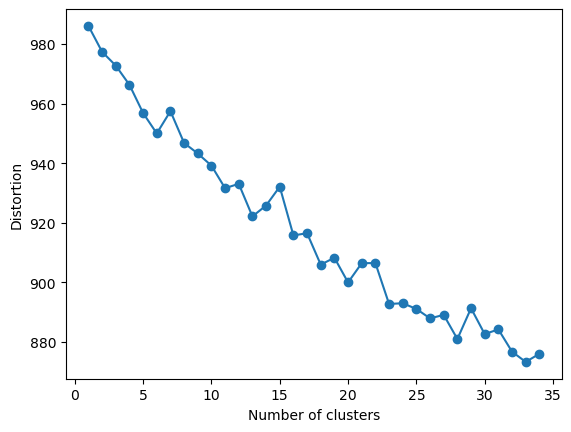

In [79]:
import matplotlib.pyplot as plt

distortions = []
for i in range(1, 35):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=1, max_iter=20,
    )
    km.fit(i_m_vector)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 35), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

# Question 4

In [116]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

In [117]:
df.head()

,Review,Liked,Data_ready,Cluster
0,Wow... Loved this place.,1,wow ... love place .,9
1,Crust is not good.,0,crust good .,0
2,Not tasty and the texture was just nasty.,0,not tasti textur nasti .,7
3,Stopped by during the late May bank holiday of...,1,stop late may bank holiday rick steve recommen...,9
4,The selection on the menu was great and so wer...,1,the select menu great price .,2


In [118]:
df

,Review,Liked,Data_ready,Cluster
0,Wow... Loved this place.,1,wow ... love place .,9
1,Crust is not good.,0,crust good .,0
2,Not tasty and the texture was just nasty.,0,not tasti textur nasti .,7
3,Stopped by during the late May bank holiday of...,1,stop late may bank holiday rick steve recommen...,9
4,The selection on the menu was great and so wer...,1,the select menu great price .,2
...,...,...,...,...
995,I think food should have flavor and texture an...,0,i think food flavor textur lack .,3
996,Appetite instantly gone.,0,appetit instant gone .,7
997,Overall I was not impressed and would not go b...,0,overal i impress would go back .,8
998,"The whole experience was underwhelming, and I ...",0,"the whole experi underwhelm , i think ll go ni...",5


In [119]:
df['Data_ready']

0                                   wow ... love place .
1                                           crust good .
2                               not tasti textur nasti .
3      stop late may bank holiday rick steve recommen...
4                          the select menu great price .
                             ...                        
995                    i think food flavor textur lack .
996                               appetit instant gone .
997                     overal i impress would go back .
998    the whole experi underwhelm , i think ll go ni...
999    then , i n't wast enough life , pour salt woun...
Name: Data_ready, Length: 1000, dtype: object

In [120]:
df['Data_ready'].values

array(['wow ... love place .', 'crust good .', 'not tasti textur nasti .',
       'stop late may bank holiday rick steve recommend love .',
       'the select menu great price .',
       'now i get angri i want damn pho .',
       "honeslti n't tast that fresh . )",
       'the potato like rubber could tell made ahead time kept warmer .',
       'the fri great .', 'a great touch .', 'servic prompt .',
       'would go back .',
       'the cashier care ever i say still end wayyy overpr .',
       'i tri cape cod ravoli , chicken , cranberri ... mmmm !',
       'i disgust i pretti sure human hair .',
       'i shock sign indic cash .', 'high recommend .',
       'waitress littl slow servic .',
       'this place worth time , let alon vega .', 'like .',
       'the burritto blah !', 'the food , amaz .', 'servic also cute .',
       'i could care le ... the interior beauti .', 'so perform .',
       "that 's right .... red velvet cake ..... ohhh stuff good .",
       '- they never brought 

In [121]:
type(df['Data_ready'].values)

numpy.ndarray

In [122]:
df.shape

(1000, 4)

In [123]:
str(df['Data_ready'].values)

'[\'wow ... love place .\' \'crust good .\' \'not tasti textur nasti .\'\n \'stop late may bank holiday rick steve recommend love .\'\n \'the select menu great price .\' \'now i get angri i want damn pho .\'\n "honeslti n\'t tast that fresh . )"\n \'the potato like rubber could tell made ahead time kept warmer .\'\n \'the fri great .\' \'a great touch .\' \'servic prompt .\' \'would go back .\'\n \'the cashier care ever i say still end wayyy overpr .\'\n \'i tri cape cod ravoli , chicken , cranberri ... mmmm !\'\n \'i disgust i pretti sure human hair .\' \'i shock sign indic cash .\'\n \'high recommend .\' \'waitress littl slow servic .\'\n \'this place worth time , let alon vega .\' \'like .\' \'the burritto blah !\'\n \'the food , amaz .\' \'servic also cute .\'\n \'i could care le ... the interior beauti .\' \'so perform .\'\n "that \'s right .... red velvet cake ..... ohhh stuff good ."\n \'- they never brought salad ask .\'\n \'this hole wall great mexican street taco , friend sta

In [124]:
len(str(df['Data_ready'].values))

42702

In [125]:
text_array = df['Data_ready'].values 

In [126]:
text = str(text_array)

In [127]:
text

'[\'wow ... love place .\' \'crust good .\' \'not tasti textur nasti .\'\n \'stop late may bank holiday rick steve recommend love .\'\n \'the select menu great price .\' \'now i get angri i want damn pho .\'\n "honeslti n\'t tast that fresh . )"\n \'the potato like rubber could tell made ahead time kept warmer .\'\n \'the fri great .\' \'a great touch .\' \'servic prompt .\' \'would go back .\'\n \'the cashier care ever i say still end wayyy overpr .\'\n \'i tri cape cod ravoli , chicken , cranberri ... mmmm !\'\n \'i disgust i pretti sure human hair .\' \'i shock sign indic cash .\'\n \'high recommend .\' \'waitress littl slow servic .\'\n \'this place worth time , let alon vega .\' \'like .\' \'the burritto blah !\'\n \'the food , amaz .\' \'servic also cute .\'\n \'i could care le ... the interior beauti .\' \'so perform .\'\n "that \'s right .... red velvet cake ..... ohhh stuff good ."\n \'- they never brought salad ask .\'\n \'this hole wall great mexican street taco , friend sta

In [128]:
stopwords = set(STOPWORDS)

In [129]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [130]:
WordCloud(background_color="white").generate(text)

In [131]:
wordcloud = WordCloud(background_color="white").generate(text)

In [132]:
wordcloud = WordCloud(stopwords=stopwords, background_color="pink").generate(str(text))

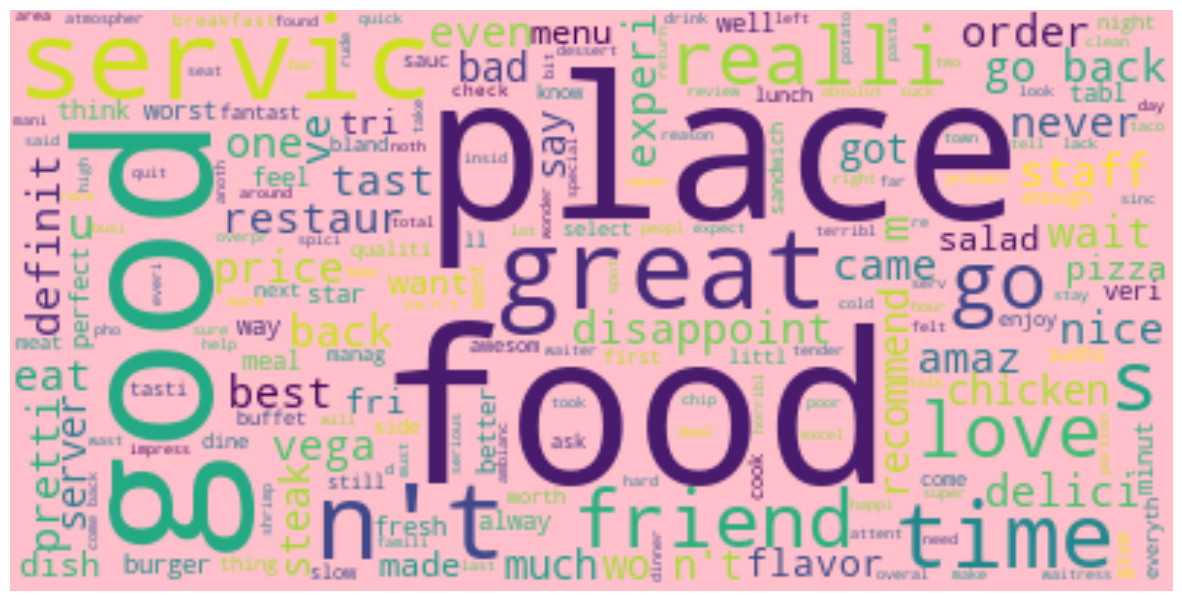

In [133]:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [134]:
y_km

array([9, 0, 7, 9, 2, 7, 7, 3, 2, 2, 6, 8, 3, 7, 7, 7, 7, 6, 4, 7, 3, 3,
       6, 3, 7, 0, 5, 4, 3, 3, 7, 4, 9, 3, 9, 3, 0, 6, 7, 6, 3, 0, 7, 2,
       7, 3, 3, 0, 5, 7, 1, 7, 0, 3, 3, 2, 7, 7, 3, 3, 7, 4, 3, 8, 1, 2,
       2, 8, 5, 2, 3, 0, 6, 7, 9, 3, 6, 0, 0, 0, 7, 9, 3, 4, 7, 9, 3, 3,
       7, 7, 7, 7, 5, 7, 7, 5, 8, 3, 0, 0, 7, 3, 7, 9, 4, 7, 3, 3, 8, 0,
       0, 3, 4, 7, 0, 7, 7, 7, 7, 9, 9, 6, 6, 9, 1, 7, 5, 6, 7, 7, 4, 7,
       3, 3, 0, 0, 7, 4, 9, 2, 7, 3, 6, 7, 7, 9, 6, 6, 7, 1, 7, 2, 1, 7,
       2, 3, 7, 7, 0, 7, 8, 7, 7, 7, 5, 7, 4, 0, 5, 7, 1, 7, 3, 7, 7, 8,
       6, 3, 8, 1, 3, 7, 7, 7, 9, 7, 3, 7, 7, 7, 3, 7, 7, 7, 7, 9, 3, 5,
       7, 7, 9, 2, 3, 2, 6, 0, 9, 3, 9, 3, 5, 1, 9, 8, 7, 0, 0, 3, 7, 3,
       3, 6, 7, 5, 7, 9, 4, 3, 7, 4, 4, 3, 7, 7, 9, 7, 7, 7, 8, 6, 1, 7,
       7, 7, 9, 1, 7, 9, 3, 8, 2, 7, 3, 9, 0, 1, 6, 7, 7, 7, 9, 7, 3, 0,
       3, 7, 6, 3, 0, 7, 3, 3, 7, 9, 0, 7, 6, 3, 7, 7, 7, 6, 1, 4, 7, 2,
       7, 1, 4, 9, 5, 7, 3, 8, 7, 7, 7, 9, 5, 6, 0,

In [135]:
df['Cluster']=y_km

In [136]:
df

,Review,Liked,Data_ready,Cluster
0,Wow... Loved this place.,1,wow ... love place .,9
1,Crust is not good.,0,crust good .,0
2,Not tasty and the texture was just nasty.,0,not tasti textur nasti .,7
3,Stopped by during the late May bank holiday of...,1,stop late may bank holiday rick steve recommen...,9
4,The selection on the menu was great and so wer...,1,the select menu great price .,2
...,...,...,...,...
995,I think food should have flavor and texture an...,0,i think food flavor textur lack .,3
996,Appetite instantly gone.,0,appetit instant gone .,7
997,Overall I was not impressed and would not go b...,0,overal i impress would go back .,8
998,"The whole experience was underwhelming, and I ...",0,"the whole experi underwhelm , i think ll go ni...",5


In [137]:
cluster_0 = df[(df["Cluster"] == 0)]
cluster_1 = df[(df["Cluster"] == 1)]
cluster_2 = df[(df["Cluster"] == 2)]
cluster_3 = df[(df["Cluster"] == 3)]
cluster_4 = df[(df["Cluster"] == 4)]
cluster_5 = df[(df["Cluster"] == 5)]
cluster_6 = df[(df["Cluster"] == 6)]
cluster_7 = df[(df["Cluster"] == 7)]
cluster_8 = df[(df["Cluster"] == 8)]
cluster_9 = df[(df["Cluster"] == 9)]
cluster_10 = df[(df["Cluster"] == 10)]

In [138]:
text_array_0 = cluster_0['Data_ready'].values 
text_array_1 = cluster_1['Data_ready'].values 
text_array_2 = cluster_2['Data_ready'].values 
text_array_3 = cluster_3['Data_ready'].values 
text_array_4 = cluster_4['Data_ready'].values 
text_array_5 = cluster_5['Data_ready'].values 
text_array_6 = cluster_6['Data_ready'].values 
text_array_7 = cluster_7['Data_ready'].values 
text_array_8 = cluster_8['Data_ready'].values 
text_array_9 = cluster_9['Data_ready'].values 
text_array_10 = cluster_10['Data_ready'].values 

In [139]:
text_0 = str(text_array_0)
text_1 = str(text_array_1)
text_2 = str(text_array_2)
text_3 = str(text_array_3)
text_4 = str(text_array_4)
text_5 = str(text_array_5)
text_6 = str(text_array_6)
text_7 = str(text_array_7)
text_8 = str(text_array_8)
text_9 = str(text_array_9)
text_10 = str(text_array_10)

In [140]:
wordcloud_0 = WordCloud(stopwords=stopwords, background_color="purple").generate(str(text_0))
wordcloud_1 = WordCloud(stopwords=stopwords, background_color="indigo").generate(str(text_1))
wordcloud_2= WordCloud(stopwords=stopwords, background_color="green").generate(str(text_2))
wordcloud_3= WordCloud(stopwords=stopwords, background_color="orange").generate(str(text_3))
wordcloud_4= WordCloud(stopwords=stopwords, background_color="red").generate(str(text_4))
wordcloud_5= WordCloud(stopwords=stopwords, background_color="blue").generate(str(text_5))
wordcloud_6= WordCloud(stopwords=stopwords, background_color="grey").generate(str(text_6))
wordcloud_7= WordCloud(stopwords=stopwords, background_color="brown").generate(str(text_7))
wordcloud_8= WordCloud(stopwords=stopwords, background_color="white").generate(str(text_8))
wordcloud_9= WordCloud(stopwords=stopwords, background_color="black").generate(str(text_9))

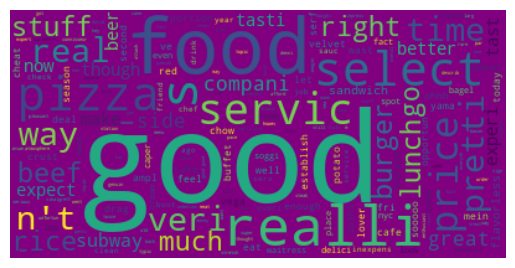

In [141]:
plt.imshow(wordcloud_0, interpolation='bilinear')
plt.axis("off")
plt.show()

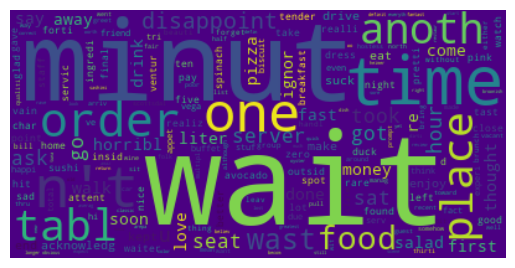

In [142]:
plt.imshow(wordcloud_1, interpolation='bilinear')
plt.axis("off")
plt.show()

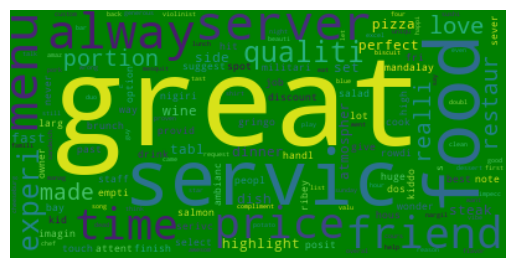

In [143]:
plt.imshow(wordcloud_2, interpolation='bilinear')
plt.axis("off")
plt.show()

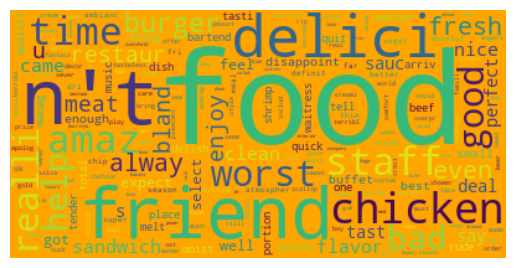

In [144]:
plt.imshow(wordcloud_3, interpolation='bilinear')
plt.axis("off")
plt.show()

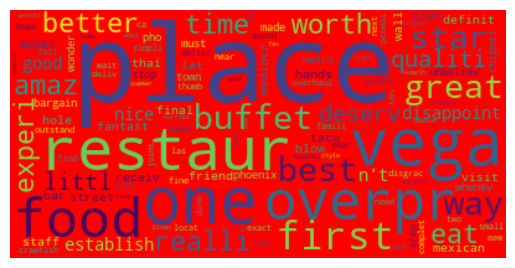

In [145]:
plt.imshow(wordcloud_4, interpolation='bilinear')
plt.axis("off")
plt.show()

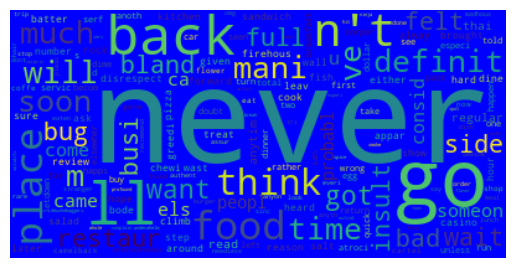

In [146]:
plt.imshow(wordcloud_5, interpolation='bilinear')
plt.axis("off")
plt.show()

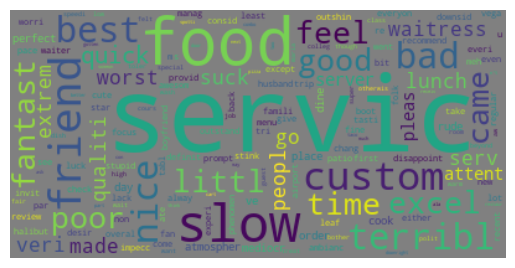

In [147]:
plt.imshow(wordcloud_6, interpolation='bilinear')
plt.axis("off")
plt.show()

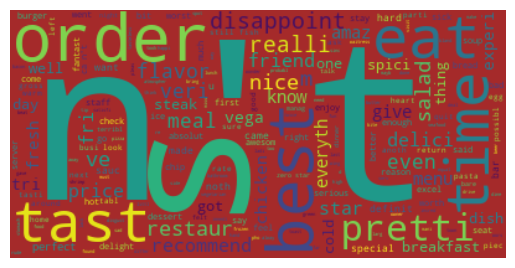

In [148]:
plt.imshow(wordcloud_7, interpolation='bilinear')
plt.axis("off")
plt.show()

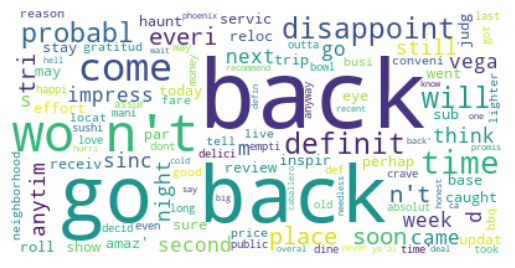

In [149]:
plt.imshow(wordcloud_8, interpolation='bilinear')
plt.axis("off")
plt.show()

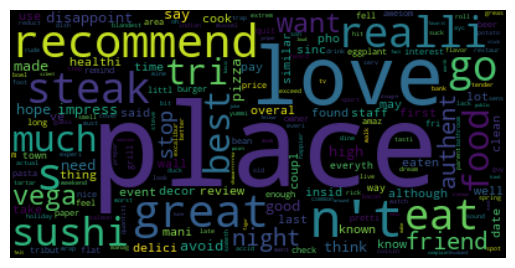

In [150]:
plt.imshow(wordcloud_9, interpolation='bilinear')
plt.axis("off")
plt.show()